In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams.update({'font.size':14}) 

# Introduction to Jupyter Notebooks - Exercises

## Overview:

This last section has some more exercises for you to practice your new Jupyter notebook skills. Not all of these exercises have linked solutions.

## Exercise: Distances

In the second half of your Relativity and Astro unit this semester you're going to come across the distance modulus equation:

$$
\mu = 5 \log_{10} d - 5
$$

where $d$ is the distance in parsecs and $\mu$ is the distance modulus (in magnitudes), defined as 
$$
\mu = m - M
$$
where $m$ is the apparent magnitude and $M$ is the absolute magnitude of an object. 

Using markdown cells, write out an equation for $d$ as a function of $\mu$.

Write a function that takes a distance in parsecs as input and gives the distance modulus as output. Write another function that does the reverse. 

Use your function to work out the distance in kpc ($10^3$ pc) of the Large Magellanic Cloud ($\mu = 18.5$ mag). 

What is the distance modulus of the Andromeda galaxy ($d = 778 $ kpc). 

If Andromeda's apparent magnitude is 3.4 mag, what is it's absolute magnitude? 

**Hint**: The magnitude system is backwards (thanks, Ancient Greeks) so a magnitude of -10 is brighter than a magnitude of 0, which is brighter than a magnitude of 10.


[solution]()

## Solution+: Distances

Starting from the distance modulus equation

$$
\mu = 5 \log_{10} d - 5
$$ 

we can rearrange to get $d$ as a function of $\mu$:

$$ 
\mu + 5 = 5 \log_{10} d
$$

$$
\dfrac{\mu + 5}{5} = \log_{10} d
$$

$$
d = 10^{(\mu + 5)/5}
$$

So our functions are:


In [2]:
def mu_to_d(mu):
    d = 10**((mu + 5.)/5.)
    return(d)

In [3]:
def d_to_mu(d):
    mu = 5. * np.log10(d) - 5.
    return(mu)

Distance to the Large Magellanic Cloud ($\mu = 18.5$ mag):

In [4]:
d_lmc = mu_to_d(18.5)
d_lmc_kpc = d_lmc / 1000.
print("d = {0:.2f} kpc".format(d_lmc_kpc))

d = 50.12 kpc


Distance modulus of Andromeda ($d = 778$ kpc):

In [5]:
mu_andromeda = d_to_mu(778 * 1000)
print("mu = {0:.2f} mag".format(mu_andromeda))

mu = 24.45 mag


Absolute magnitude (M) of Andromeda ($m = 3.4$ mag):

$$
\mu = m - M
$$

$$
M = m - \mu
$$

In [6]:
def abs_mag(app_mag, mu):
    abs_mag = app_mag - mu
    return(abs_mag)
    

In [7]:
abs_mag_andromeda = abs_mag(3.4, mu_andromeda)
print("M = {0:.2f}".format(abs_mag_andromeda))

M = -21.05


Always a good idea to check if these numbers are about right, which we can do [on the Nasa Extragalactic Database](http://ned.ipac.caltech.edu/byname?objname=m31) or [on this slightly less scientific website](https://en.wikipedia.org/wiki/Andromeda_Galaxy)

:solution+

# Exercise: The central limit theorem

Use the `np.random.normal` function to generate an array of 10 random numbers with a mean of 10 and a standard deviation of 3. Using `density=True` in `plt.hist` plot the probability density of the results. 

Repeat this for samples of 100 and 1000 random numbers and plot the histograms of the results. Choose an appropriate bin size for your histogram.

On the same plot as each of your histograms, plot a Normal (Gaussian) distribution:

$$ f(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

for $\mu = 10$, $\sigma = 3$. 

Are the results what you expect? Write a few sentances about how the results compare to your expectations for 10, 100 and 1000 random numbers.

Write a function that takes the sample size ($n$), mean ($\mu$), and standard deviation ($\sigma$) as input and generates a sample of $n$ normally distributed random numbers. Your function should plot the probability density of the sample along with the Normal distribution. The plot should have a title that states the input values of $n$, $\mu$ and $\sigma$ and should have appropriate axis labels. 

Look at how the plot changes as you increase $n$. Is it doing what you expect? 

**Hint**: Take a look at the documentation for [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) if you're not sure where to start.

[solution]()

## Solution: The central limit theorem

I'm not providing a full solution for this exercise, but this is the kind of thing your function should generate:

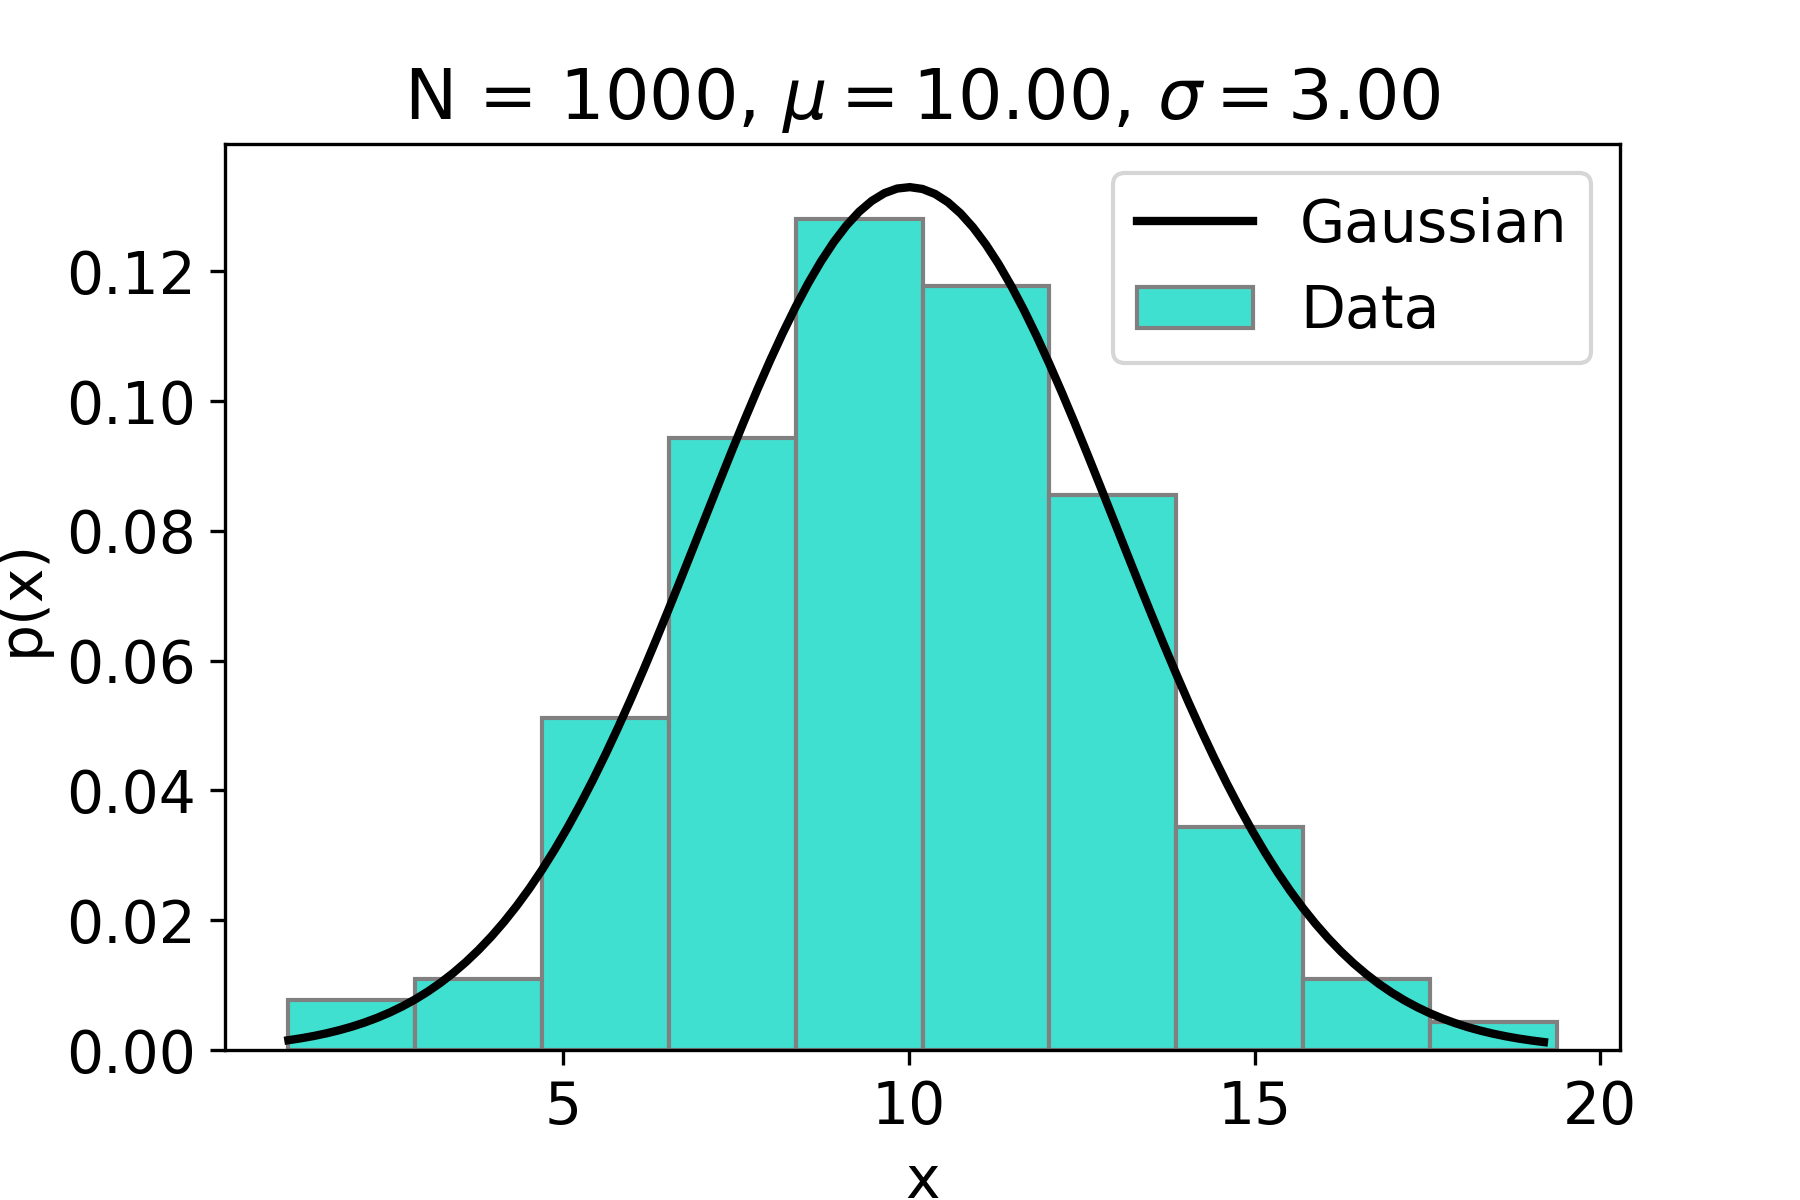

# Exercise: Pulse on a wire

In this exercise we're looking at how to apply your coding skills beyond this lab unit. You can use the same techniques that we use to look at concepts in the lab to help you visualise problems from your other units  This question adapted from one of your Semester 1 Vibrations Waves and Optics problem sheets.

Consider a transverse wave pulse on a wire that, at $t=0$, can be described by  

$$
y(x) = \dfrac{4 \times 10^{-3}}{\left(100 x\right)^2 + 4}
$$

where $x$ and $y$ are both in metres. 

Plot the pulse for $-0.1$ m $< x < 0.1$ m. Your plot should have appropriate axis labels and units. 

Write down an expression for $y(x, t, v)$ for this wave travelling in the positive $x$ direction at a velocity $v$. Convert this expression into a function. 

Plot the displacement, $y$, as a function of time at $x= 0.1$ m for a wave travelling with $v = 2$ m s$^{-1}$.

What is the earliest time that the displacement caused by the wave reaches 0.5 mm?

[solution]()

# Solution+: Pulse on a wire

This exercise combines a few Python concepts that you've covered so far: functions, plotting and arrays.

The first part is straight forward. We can set up a function for $y(x)$ and plot it for $-0.1$ m $< x < 0.1$ m.

Text(0, 0.5, '$y(x)$ (m)')

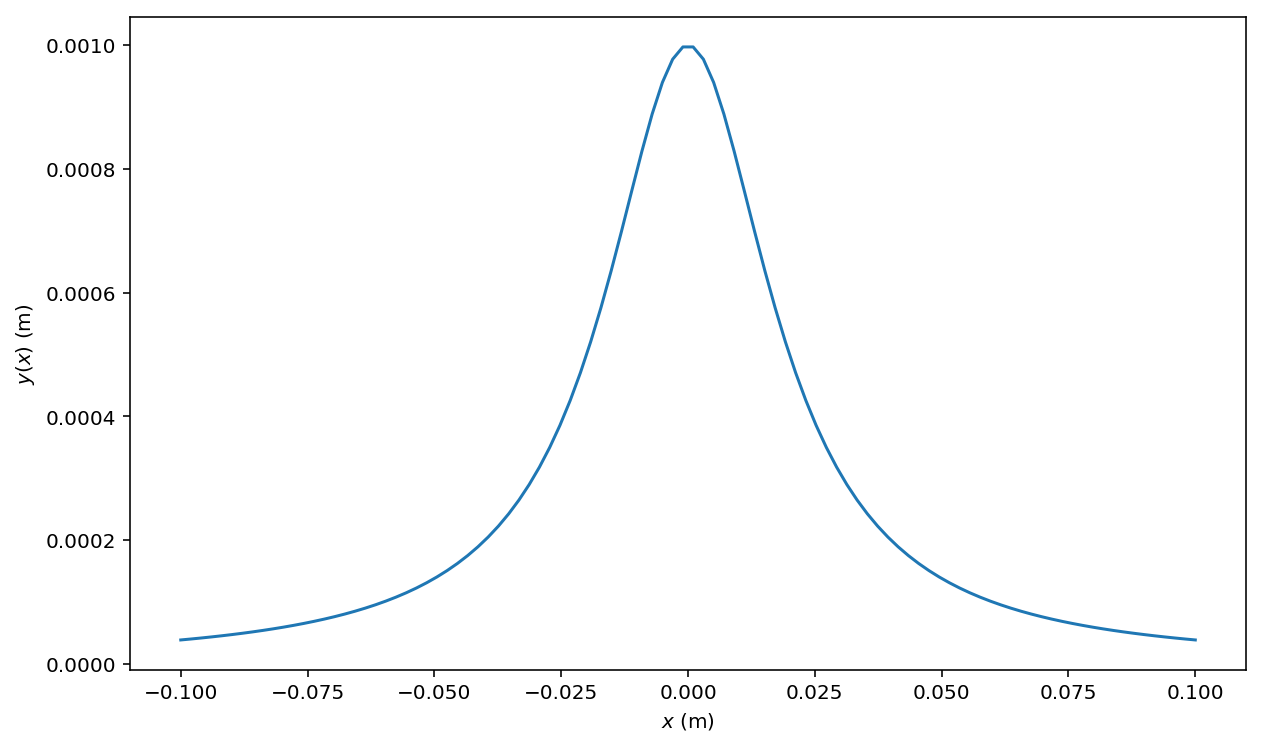

In [8]:
def pulse(x):
    y = (4e-3) / ((100 * x)**2 + 4)
    return(y)

x = np.linspace(-0.1, 0.1, 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(x, pulse(x))
ax.set_xlabel('$x$ (m)')
ax.set_ylabel('$y(x)$ (m)')


For the next part we have to find a new expression for $y(x, t)$. This is where markdown cells come in handy. 

We could write all the maths out properly in markdown, but what if it's super complicated and we keep getting confused by the number of brackets? We can just write it out by hand, take a picture and add that to our markdown cell. **Note**: If you're writing a lab report or something more formal, you should type up the equations properly, but if you're just making notes to yourself, it's perfectly fine to do this.

See the [Electronic Lab Books](02_intro_to_markdown.ipynb) section if you need help adding an image.

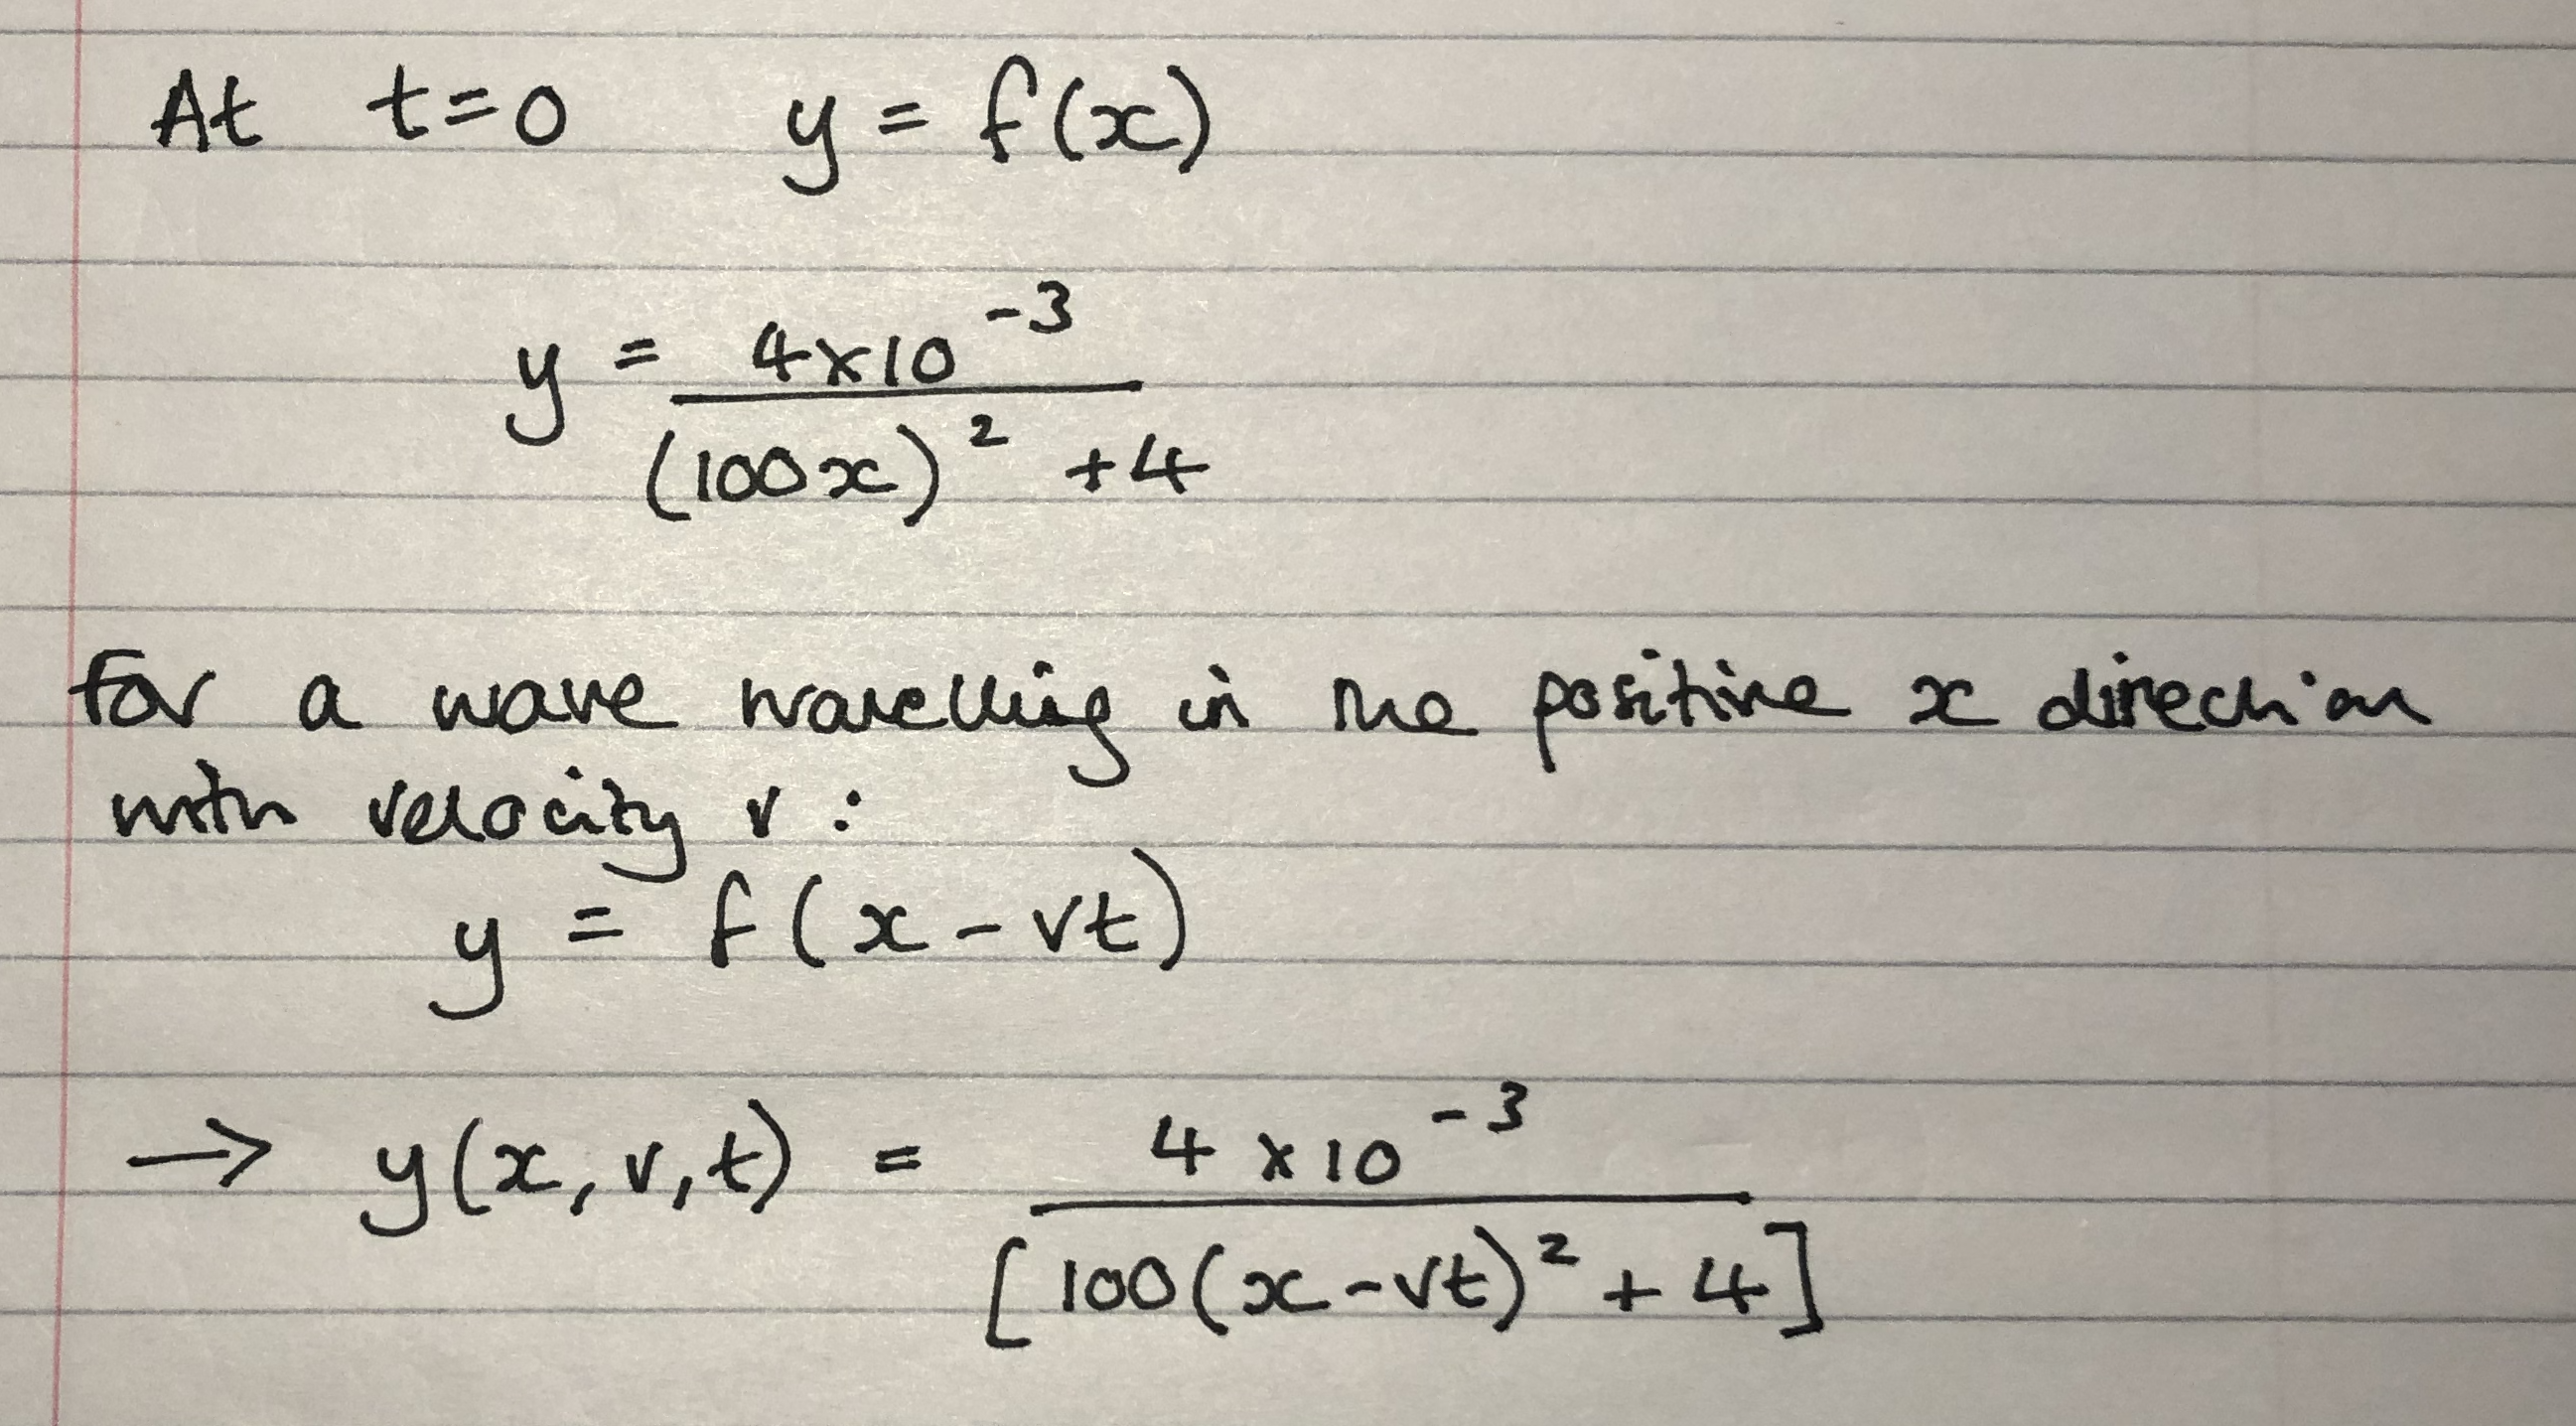

Now we can define a new function `displacement`:

In [9]:
def displacement(x, t, v):
    y = (4e-3) / ((100 * (x - v*t))**2 + 4)
    return(y)

And we can plot the displacement as a function of time for $x=0.1$ m, $v = 2$ m s$^{-1}$.

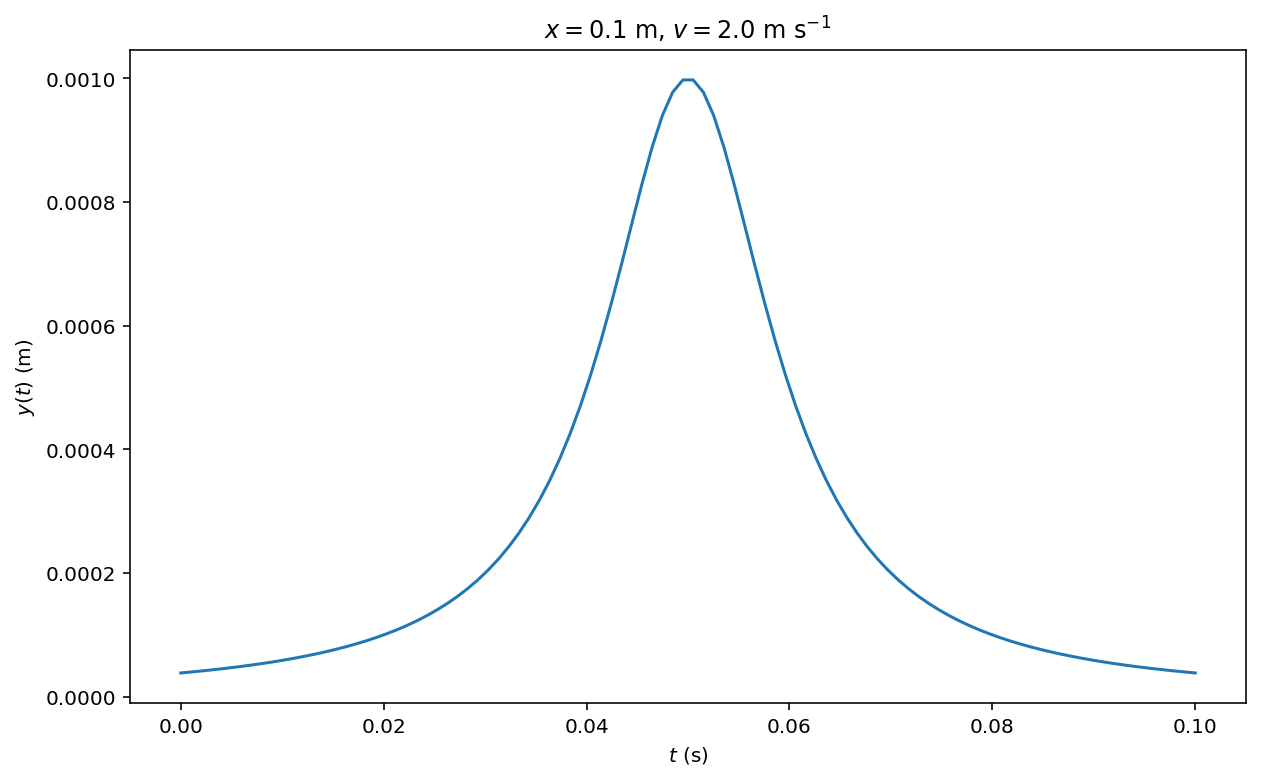

In [10]:
t = np.linspace(0, 0.1, 100)

x_0 = 0.1
v = 2

fig = plt.figure(figsize=(10,6))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t, displacement(x_0, t, v))
ax2.set_xlabel('$t$ (s)')
ax2.set_ylabel('$y(t)$ (m)')
title_string = '$x = {0:.1f}$ m, $v = {1:.1f}$ m s$^{{-1}}$'.format(x_0, v)
ax2.set_title(title_string)
plt.show()


The last part of the question uses some tricks with arrays. This won't give you an **exact** answer, but it's a good way to check if the answer you've worked out numerically is reasonable. 

When we made the figure above we set up an array of times:
```py
t = np.linspace(0, 0.1, 100)
```
This gives us an array, `t`, with 100 equally spaced values between 0 and 0.1.

Instead of plotting `displacement(x_0, t, v)` we can save the output as an array, `y_vals`

In [11]:
y_vals = displacement(x_0, t, v)

One of the useful things about arrays is that you can use logical expressions when you index them. It's simple to get the values of `y_vals` that are larger than 0.5 mm:

In [12]:
y_vals[y_vals > 0.5e-3]

array([0.00052061, 0.00057565, 0.00063536, 0.00069877, 0.00076415,
       0.00082877, 0.0008889 , 0.00094005, 0.00097756, 0.00099746,
       0.00099746, 0.00097756, 0.00094005, 0.0008889 , 0.00082877,
       0.00076415, 0.00069877, 0.00063536, 0.00057565, 0.00052061])

What we want to know is the **time** when the displacement is greater than 0.5 mm. Because our two arrays are the same shape we can use the same logical expression to index the `t` array:

In [13]:
t[y_vals > 0.5e-3]

array([0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
       0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
       0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
       0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596])

Now we have all the times that the displacement is greater than 0.5 mm. To get the first one, we just slice the array to get the first value:

In [14]:
t_d_over_5mm = t[y_vals > 0.5e-3][0]
print(t_d_over_5mm)

0.0404040404040404


This isn't the exact answer you'd get if you worked through the maths (the exact answer is $t=0.04$ s). How close we are to the true answer depends on how small our time steps are when we set up the `t` array. But it is useful as an approximation. 

You can play around with your code to see how changing the number of time steps affects your answer. See how it changes when you use 10, 100 or 10000 steps. 

:solution+